In [1]:
import openpyxl as px

In [10]:
import numpy as np
import pandas as pd

In [51]:
# plot in 3d using plotly
import plotly.graph_objects as go
import numpy as np


In [65]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning:

Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.



In [2]:
file = 'SoilCdataALcottonfield.xlsx'
wb_obj = px.load_workbook(file, read_only=True, data_only=True)
sheet_obj = wb_obj.active
row = sheet_obj.max_row
column = sheet_obj.max_column

In [11]:
# column 1, sample ids
# indexs start at row 14, and are formatted with numbers (location_id) - (sample_id) - (portion_id)
# position ids are A-F
# the row after position F is the entire sample
# the row after the entire sample is the next location
data = np.zeros((25, 5, 6))
for location_id_row in range(25):
    for sample_id_row in range(5):
        for position_id_row in range(6):
            row = location_id_row*35+sample_id_row*7+14+position_id_row
            val = sheet_obj.cell(row=row, column=1).value

        row = location_id_row*35+sample_id_row*7+14+6
        val = sheet_obj.cell(row=row, column=1).value

In [12]:

data = np.zeros((25, 5, 6, 5), dtype=object)
sample_ids = []
c_percents = []
lats = []
lons = []

for location_id_row in range(25):
    lat = sheet_obj.cell(row=location_id_row*35+14, column=2).value
    lon = sheet_obj.cell(row=location_id_row*35+14, column=3).value
    for sample_id_row in range(5):
        for position_id_row in range(6):
            row = location_id_row*35+sample_id_row*7+14+position_id_row
            id_val = sheet_obj.cell(row=row, column=1).value
            c_percent = sheet_obj.cell(row=row, column=8).value
            sample_ids.append(id_val)
            c_percents.append(c_percent)
            data[location_id_row, sample_id_row, position_id_row, 0] = id_val

            data[location_id_row, sample_id_row, position_id_row, 1] = float(c_percent)
            data[location_id_row, sample_id_row, position_id_row, 2] = lat
            data[location_id_row, sample_id_row, position_id_row, 3] = lon


In [48]:
# this is an index of the depths of the samples
# A= 0-5; B=5-10; C=10-15; D=15-20; E=20-25; F=25-30
# make a volumetric 3d visualization of the data
data[:, :, 0, 4] = -2.5
data[:, :, 1, 4] = -7.5
data[:, :, 2, 4] = -12.5
data[:, :, 3, 4] = -17.5
data[:, :, 4, 4] = -22.5
data[:, :, 5, 4] = -27.5


In [49]:
# make data into a pandas dataframe


df = pd.DataFrame(data.reshape(-1, 5), columns=['id', 'c_percent', 'lat', 'lon', 'alt'])

In [50]:
df['c_percent'] = df['c_percent'].astype(float)
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)
df['alt'] = df['alt'].astype(float)

In [60]:
# fig = go.Figure(data=
#                 [go.Scatter3d(
#                     # data=df, 
#                     x=df['lat'],
#                     y=df['lon'],
#                     z=df['alt'],
#                     # do cube markers
#                     mode='markers', 
#                     marker=dict(size=20, color=df['c_percent'], colorscale='Viridis', opacity=.1, colorbar=dict(title='C Percent')),
#                     text=df['id'],
#                     )])
# fig.show()


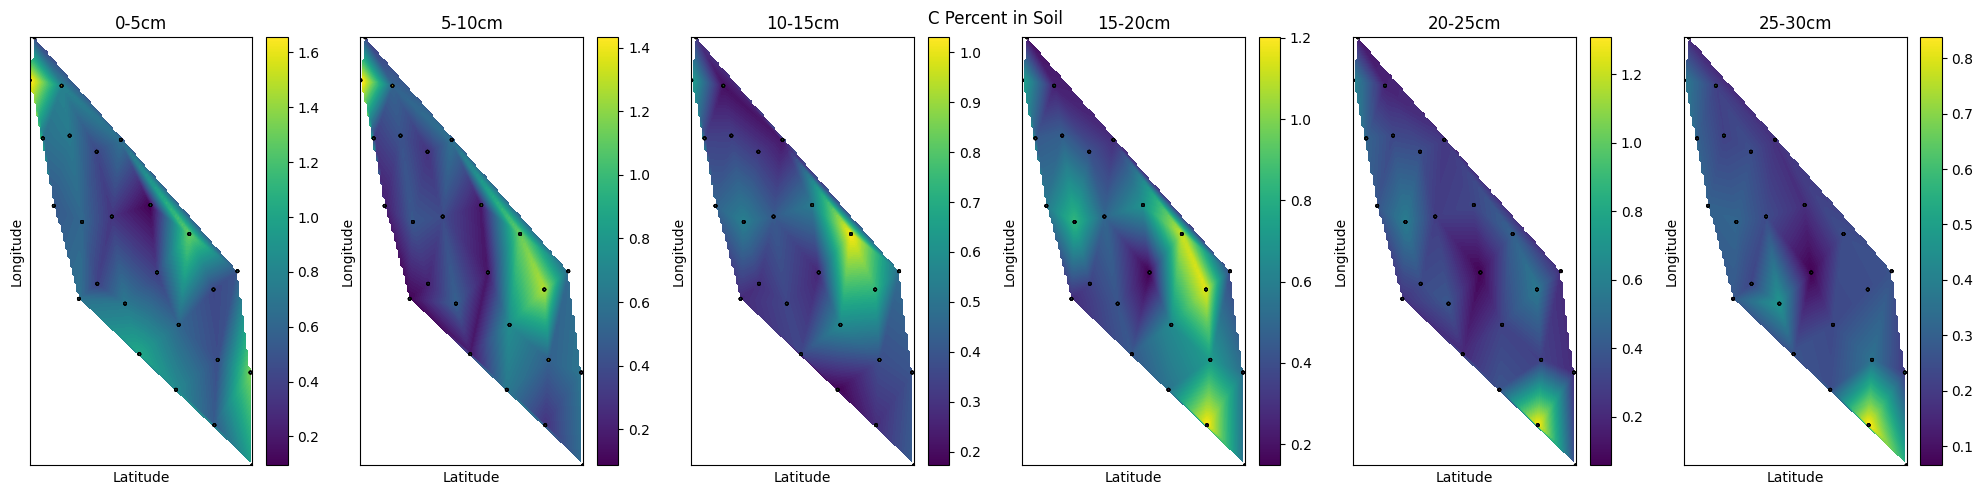

In [200]:
# layer = 0
n_layer = data.shape[2]
layer_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

fig, ax = plt.subplots(1, n_layer, figsize=(20, 5))
for layer in range(n_layer):
    z = data[:, :, layer, 1].astype(float).flatten()
    x = data[:, :, layer, 2].astype(float).flatten()
    y = data[:, :, layer, 3].astype(float).flatten()
    npts = 125
    ngridx = 100
    ngridy = 200
    xi = np.linspace(x.min(), x.max(), ngridx)
    yi = np.linspace(y.min(), y.max(), ngridy)
    triang = tri.Triangulation(x, y)
    interpolator = tri.LinearTriInterpolator(triang, z, trifinder=triang.get_trifinder())
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)
    
    ax[layer].set_title(layer_labels[layer]+'cm')
    ax[layer].set_xlim(x.min(), x.max())
    ax[layer].set_xticks([])
    ax[layer].set_ylim(y.min(), y.max())
    ax[layer].set_yticks([])
    ax[layer].set_xlabel('Latitude')
    ax[layer].set_ylabel('Longitude')
    ax[layer].contourf(xi, yi, zi, levels=100)
    # ax[layer].contour(xi, yi, zi, levels=100, linewidths=0.5)
    fig.colorbar(ax[layer].scatter(x, y, c=z, s=3, edgecolors='k'), ax=ax[layer])
fig.tight_layout()
fig.suptitle('C Percent in Soil')
plt.show()

In [151]:
fig = go.Figure(data=
                [go.Contour(
                    x = xi,
                    y = yi,
                    z = zi,
                    colorscale='Viridis',
                    
                    )])
fig.show()